# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install opencv-python matplotlib albumentations labelme tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.9 MB/s eta 0:00:00


In [2]:
!pip install opencv-python-headless

### 1.2 Collect images using OpenCV

In [3]:
import os
import shutil
from google.colab import drive
import cv2
import json
import glob

### 1.3 Annonate Images with LabelMe

In [4]:
# Mount Google Drive (if your data is stored there)
drive.mount('/content/drive')

# Define base directory (where "data" folder is located)
base_dir = "/content/drive/My Drive/Colab Notebooks/data"

# Define paths to your dataset (update these paths accordingly)
IMAGES_PATH = "/content/drive/MyDrive/Colab Notebooks/data/images"  # Path to images
ANNOTATIONS_PATH = "/content/drive/MyDrive/Colab Notebooks/data/labels"  # Path to JSON labels

# Get a list of all image files
image_files = glob.glob(os.path.join(IMAGES_PATH, "*.jpg"))  # Change extension if needed
json_files = glob.glob(os.path.join(ANNOTATIONS_PATH, "*.json"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Check if images and annotations are correctly loaded
print(f"Total Images: {len(image_files)}")
print(f"Total JSON Annotations: {len(json_files)}")

Total Images: 0
Total JSON Annotations: 0


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [6]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU memory Growth

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### 2.3 Load Image into TF Data Pipeline

In [8]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/data/*/images/*.jpg')

In [9]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/Colab Notebooks/data/train/images/eef23567-d7b3-11ef-94c8-1856802c7490.jpg'

In [10]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [11]:
images = images.map(load_image)

array([[[253, 255, 242],
        [254, 255, 243],
        [250, 253, 242],
        ...,
        [ 54,  56,  45],
        [ 52,  53,  45],
        [ 51,  52,  44]],

       [[252, 255, 238],
        [253, 255, 241],
        [252, 255, 241],
        ...,
        [ 59,  61,  48],
        [ 58,  60,  49],
        [ 58,  60,  49]],

       [[254, 255, 235],
        [253, 255, 234],
        [250, 255, 233],
        ...,
        [ 61,  62,  48],
        [ 58,  60,  47],
        [ 57,  59,  46]],

       ...,

       [[ 33,  41,  30],
        [ 34,  42,  31],
        [ 36,  43,  35],
        ...,
        [  6,  12,   2],
        [  6,  11,   4],
        [  5,  10,   3]],

       [[ 38,  35,  28],
        [ 40,  37,  30],
        [ 41,  41,  33],
        ...,
        [  8,  11,   2],
        [  7,  10,   1],
        [  6,   9,   0]],

       [[ 41,  34,  28],
        [ 43,  36,  30],
        [ 44,  39,  33],
        ...,
        [  8,   9,   1],
        [  6,   9,   0],
        [  5,   8,   0]]], dtype=uint8)
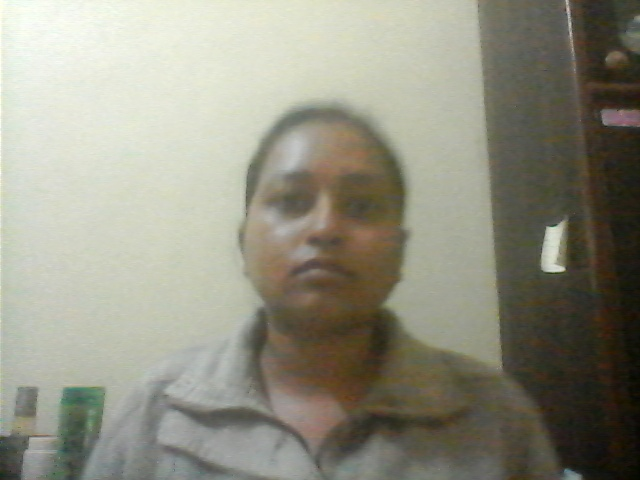

In [12]:
images.as_numpy_iterator().next()

In [13]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [14]:
image_generator = images.batch(4).as_numpy_iterator()

In [15]:
plot_images = image_generator.next()

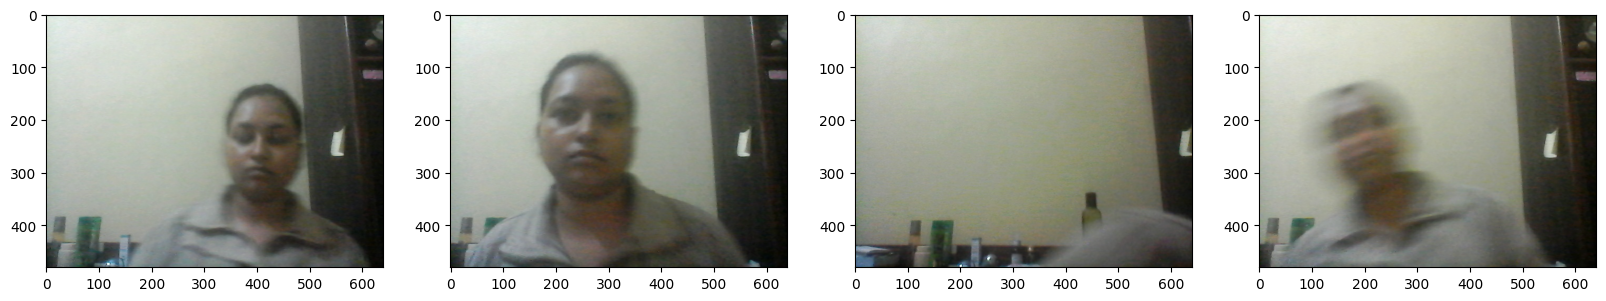

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLIT DATA INTO TRAIN TEST AND VAL

In [17]:
90*.7 #63 to train

62.99999999999999

In [18]:
90*.15 #14 & 13 to test and val

13.5

### 3.4 Move the Matching Labels

In [19]:
for folder in ['train', 'test', 'val']:
    image_folder = os.path.join(base_dir, folder, 'images')  # Image folder path
    label_folder = os.path.join(base_dir, folder, 'labels')  # Label folder path

    # Ensure labels folder exists
    os.makedirs(label_folder, exist_ok=True)

    # Iterate over image files in the current images folder
    for file in os.listdir(image_folder):
        # Get corresponding JSON file name
        filename = file.split('.')[0] + '.json'

        # Original location of JSON files in 'data/labels'
        existing_filepath = os.path.join(base_dir, 'labels', filename)

        # New location in respective 'labels' folder
        new_filepath = os.path.join(label_folder, filename)

        # Move the JSON file if it exists
        if os.path.exists(existing_filepath):
            os.replace(existing_filepath, new_filepath)

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [20]:
import albumentations as alb
from albumentations import Compose

In [21]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [22]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/train/images/07384812-d7b4-11ef-9d6c-1856802c7490.jpg")

array([[[120, 122, 122],
        [123, 128, 127],
        [109, 114, 113],
        ...,
        [  0,   1,   6],
        [  0,   0,   6],
        [  0,   0,   6]],

       [[117, 122, 121],
        [121, 127, 126],
        [109, 115, 114],
        ...,
        [  0,   1,   6],
        [  0,   0,   6],
        [  0,   0,   6]],

       [[112, 123, 121],
        [118, 129, 127],
        [105, 116, 114],
        ...,
        [  0,   0,   5],
        [  0,   0,   5],
        [  0,   0,   5]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
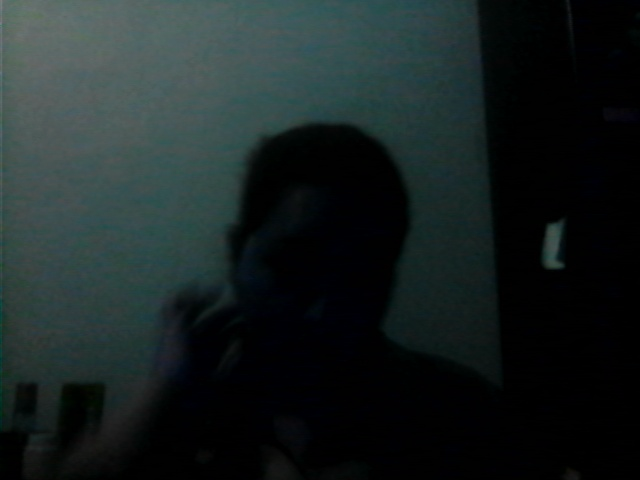

In [23]:
img

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/data/train/labels/07384812-d7b4-11ef-9d6c-1856802c7490.json") as f:
   label = json.load(f)

In [ ]:
label['shapes'][0]['points']

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

In [ ]:
coords = list(np.divide(coords, [640,480,640,480]))

In [ ]:
coords

### 4.4 Apply Augmentations and View Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
type(augmented)

In [ ]:
augmented.keys()

In [ ]:
augmented['image']

In [ ]:
augmented['image'].shape

In [ ]:
augmented['bboxes']

In [ ]:
cv2.rectangle(augmented['image'],
                        tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
                        tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                              (250,0,0), 2)

plt.imshow(augmented['image'])

## 5. Build and Run Augmentation Pipeline

#### 5.1 Run Augmentation Pipeline

In [ ]:
for partition in ['train', 'test', 'val']:
    os.makedirs(os.path.join('aug_data', partition, 'images'), exist_ok=True)
    os.makedirs(os.path.join('aug_data', partition, 'labels'), exist_ok=True)

In [ ]:
# Update dataset paths for Colab
data_path = '/content/drive/MyDrive/Colab Notebooks/data'  # Update to your actual data path
output_path = '/content/drive/MyDrive/Colab Notebooks/aug_data'  # Update to your actual output path

# Ensure directories exist
for partition in ['train', 'test', 'val']:
    os.makedirs(os.path.join(output_path, partition, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_path, partition, 'labels'), exist_ok=True)

# Process each dataset partition
for partition in ['train', 'test', 'val']:
    images_path = os.path.join(data_path, partition, 'images')
    labels_path = os.path.join(data_path, partition, 'labels')

    for image in os.listdir(images_path):
        img_path = os.path.join(images_path, image)
        img = cv2.imread(img_path)

        coords = [0, 0, 0.00001, 0.00001]
        label_file = os.path.join(labels_path, f'{os.path.splitext(image)[0]}.json')

        # Load label if it exists
        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(0):
                # Apply augmentation
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                # Save augmented image
                aug_img_path = os.path.join(output_path, partition, 'images', f'{os.path.splitext(image)[0]}.{x}.jpg')
                cv2.imwrite(aug_img_path, augmented['image'])

                # Create annotation
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_file):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                # Save augmented label
                aug_label_path = os.path.join(output_path, partition, 'labels', f'{os.path.splitext(image)[0]}.{x}.json')
                with open(aug_label_path, 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"Error processing {image}: {e}")

#### Load Augmented Images to Tensorflow Dataset

In [ ]:
# Define function to load image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

In [ ]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255.0)

In [ ]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255.0)

In [ ]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255.0)

In [ ]:
train_images.as_numpy_iterator().next()

## 6.Prepare Labels

#### 6.1 Build Label Loading Function

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
    label = json.load(f)

  return [label['class']], label['bbox']

#### 6.2 Load Labels to Tensorflow Dataset

In [ ]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

## 7. Combine Label and Image Samples

#### 7.1 Check Partition Lengths

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

#### 7.2 Create Final Datasets (Images/Labels)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

#### 7.3 View Images and Annotations

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  sample_image = res[0][idx].copy()
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                      (255,0,0),2)

  ax[idx].imshow(sample_image)

## 8. Build Deep Learning using the Functional API

#### 8.1 Import Layer and Base Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Add, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

#### 8.2  Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

In [ ]:
vgg.summary()

#### 8.3 Build instance of Network

In [ ]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))

    # Load VGG16 without fully connected layers
    base_model = VGG16(include_top=False, input_tensor=input_layer)
    base_model.trainable = False  # Freeze VGG16 layers

    # Classification Model
    f1 = GlobalMaxPooling2D()(base_model.output)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(base_model.output)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

#### 8.4 Test out Neutral Network

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

In [ ]:
classes, coords = facetracker.predict(X)

In [ ]:
classes, coords

### 9.Define Losses and Optimizers

#### 9.1 Define Optimizer and LR

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1)/batches_per_epoch

In [ ]:
lr_decay

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

#### 9.2 Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]

    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

#### 9.3 Test Out Loss Metrics

In [ ]:
localization_loss(y[1], coords).numpy()

In [ ]:
localization_loss(y[1], coords)

In [ ]:
classloss(y[0], classes)

In [ ]:
regressloss(y[1], coords)

### 10. Train Neural Network

#### 10.1 Create Custom Model Class

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt  # Store optimizer for later use

    def train_step(self, batch):
        X, (class_labels, bbox_labels) = batch

        # Ensure correct dtype
        class_labels = tf.cast(class_labels, tf.float32)
        bbox_labels = tf.cast(bbox_labels, tf.float32)

        class_labels = tf.cond(
           tf.equal(tf.shape(class_labels)[-1], 1),
           lambda: tf.squeeze(class_labels, axis=-1),
           lambda: class_labels
        )

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            # Compute losses
            batch_classloss = self.closs(class_labels, classes)
            batch_localizationloss = self.lloss(bbox_labels, coords)

            # Reduce mean to ensure scalar loss
            batch_classloss = tf.reduce_mean(batch_classloss)
            batch_localizationloss = tf.reduce_mean(batch_localizationloss)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

        # Compute gradients and apply updates
        grads = tape.gradient(total_loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.model.trainable_variables))

        return {
            "total_loss": total_loss,
            "class_loss": batch_classloss,
            "regress_loss": batch_localizationloss
        }

    def test_step(self, batch):
        X, (class_labels, bbox_labels) = batch

        class_labels = tf.cast(class_labels, tf.float32)
        bbox_labels = tf.cast(bbox_labels, tf.float32)

        # Fix OperatorNotAllowedInGraphError
        class_labels = tf.cond(
            tf.equal(tf.shape(class_labels)[-1], 1),
            lambda: tf.squeeze(class_labels, axis=-1),
            lambda: class_labels
        )

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(class_labels, classes)
        batch_localizationloss = self.lloss(bbox_labels, coords)

        batch_classloss = tf.reduce_mean(batch_classloss)
        batch_localizationloss = tf.reduce_mean(batch_localizationloss)

        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {
            "total_loss": total_loss,
            "class_loss": batch_classloss,
            "regress_loss": batch_localizationloss
        }

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt=opt, classloss=classloss, localizationloss=regressloss)

#### 10.2 Train

In [ ]:
logdir = "logs"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

#### 10.3 Plot Performance

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

### 11. Make Predictions

#### 11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

#### 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()